In [106]:
#importing necessary libraries
import pandas as pd
import csv
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt


In [67]:
#converting csv files into readable dataframes
shel_df = pd.read_csv(Path('data/SHEL_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
shel_df = shel_df["Adj Close"]

shel_df.head()
                      

Date
2017-10-01   49.57
2017-11-01   50.43
2017-12-01   53.26
2018-01-01   56.07
2018-02-01   50.51
Name: Adj Close, dtype: float64

In [3]:
##converting csv files into readable dataframes
xom_df = pd.read_csv(Path('data/XOM_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
xom_df = xom_df["Adj Close"]

xom_df.head()
              

Date
2017-10-01    64.010841
2017-11-01    63.964775
2017-12-01    64.828041
2018-01-01    67.664841
2018-02-01    58.704857
Name: Adj Close, dtype: float64

In [4]:
#converting csv files into readable dataframes
ixc_df = pd.read_csv(Path('data/IXC_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
ixc_df = ixc_df["Adj Close"]

ixc_df.head()
              

Date
2017-10-01    27.338148
2017-11-01    27.707043
2017-12-01    28.508978
2018-01-01    29.981033
2018-02-01    27.226599
Name: Adj Close, dtype: float64

In [6]:
#converting csv files into readable dataframes
cvx_df = pd.read_csv(Path('data/CVX_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cvx_df = cvx_df["Adj Close"]

cvx_df.head()
              

Date
2017-10-01     92.921890
2017-11-01     95.407494
2017-12-01    101.318382
2018-01-01    101.447868
2018-02-01     90.578758
Name: Adj Close, dtype: float64

In [7]:
#converting csv files into readable dataframes
cop_df = pd.read_csv(Path('data/COP_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cop_df = cop_df["Adj Close"]

cop_df.head()

Date
2017-10-01    43.725098
2017-11-01    43.726921
2017-12-01    47.173164
2018-01-01    50.542061
2018-02-01    46.674702
Name: Adj Close, dtype: float64

In [47]:
#converting csv files into readable dataframes
#you can go back to the entire df by deleting "treasury_df = treasury_df["Adj Close"]", was not sure which columns we need
treasury_df = pd.read_csv(Path('data/10_yr_treasury_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
treasury_df = treasury_df["Adj Close"]
treasury_df.head()

Date
2017-10-01   2.38
2017-11-01   2.42
2017-12-01   2.40
2018-01-01   2.72
2018-02-01   2.87
Name: Adj Close, dtype: float64

In [20]:
#concatinating the dataframes to organize data in order to eventually get cumulative monthly returns
energy_stocks_df = pd.concat([shel_df, cop_df,cvx_df,xom_df,ixc_df],
                            axis=1)
energy_stocks_df=energy_stocks_df.set_axis(['SHEL', 'COP', 'CVX','XOM', 'IXC'], axis=1)
energy_stocks_df.head()

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-10-01,49.569248,43.725098,92.921890,64.010841,27.338148
2017-11-01,50.426472,43.726921,95.407494,63.964775,27.707043
2017-12-01,53.255947,47.173164,101.318382,64.828041,28.508978
2018-01-01,56.074009,50.542061,101.447868,67.664841,29.981033
2018-02-01,50.509724,46.674702,90.578758,58.704857,27.226599


<AxesSubplot:title={'center':'Monthly Returns'}, xlabel='Date'>

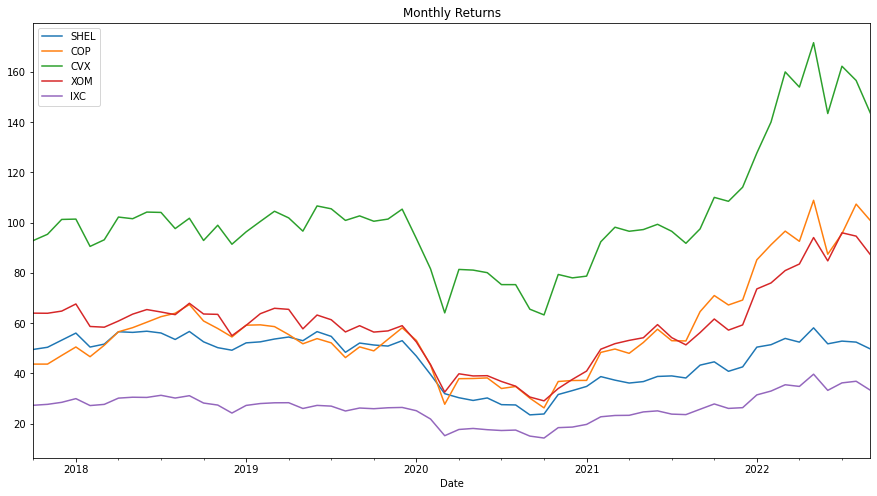

In [53]:
#visualizing monthly returns
energy_stocks_df.plot(figsize=(15,8), title = 'Monthly Returns')

In [55]:
#stocks return summary
energy_stocks_df.describe()


,SHEL,COP,CVX,XOM,IXC
count,60.00,60.00,60.00,60.00,60.00
mean,45.89,57.48,102.56,59.01,26.30
std,9.80,19.45,23.82,15.47,5.65
min,23.52,26.30,63.30,29.09,14.30
25%,38.61,46.59,92.27,52.37,23.55
50%,50.45,53.38,99.19,59.09,26.74
75%,53.04,62.95,104.79,64.56,30.03
max,58.16,108.93,171.67,96.00,39.71


In [70]:
#calculated percentage change
energy_stocks_df.pct_change().dropna().head()



,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-11-01,0.02,0.00,0.03,-0.00,0.01
2017-12-01,0.06,0.08,0.06,0.01,0.03
2018-01-01,0.05,0.07,0.00,0.04,0.05
2018-02-01,-0.10,-0.08,-0.11,-0.13,-0.09
2018-03-01,0.02,0.10,0.03,-0.00,0.02


In [73]:
display(xom_df.describe())
display(cop_df.describe())
display(cvx_df.describe())
display(shel_df.describe())

count   60.00
mean    59.01
std     15.47
min     29.09
25%     52.37
50%     59.09
75%     64.56
max     96.00
Name: Adj Close, dtype: float64

count    60.00
mean     57.48
std      19.45
min      26.30
25%      46.59
50%      53.38
75%      62.95
max     108.93
Name: Adj Close, dtype: float64

count    60.00
mean    102.56
std      23.82
min      63.30
25%      92.27
50%      99.19
75%     104.79
max     171.67
Name: Adj Close, dtype: float64

count   60.00
mean    45.89
std      9.80
min     23.52
25%     38.61
50%     50.45
75%     53.04
max     58.16
Name: Adj Close, dtype: float64

In [74]:
display(xom_df.pct_change())
display(cop_df.pct_change())
display(cvx_df.pct_change())
display(shel_df.pct_change())

Date
2017-10-01     NaN
2017-11-01   -0.00
2017-12-01    0.01
2018-01-01    0.04
2018-02-01   -0.13
2018-03-01   -0.00
2018-04-01    0.04
2018-05-01    0.04
2018-06-01    0.03
2018-07-01   -0.01
2018-08-01   -0.02
2018-09-01    0.07
2018-10-01   -0.06
2018-11-01   -0.00
2018-12-01   -0.13
2019-01-01    0.07
2019-02-01    0.08
2019-03-01    0.03
2019-04-01   -0.01
2019-05-01   -0.12
2019-06-01    0.10
2019-07-01   -0.03
2019-08-01   -0.08
2019-09-01    0.04
2019-10-01   -0.04
2019-11-01    0.01
2019-12-01    0.04
2020-01-01   -0.11
2020-02-01   -0.17
2020-03-01   -0.25
2020-04-01    0.22
2020-05-01   -0.02
2020-06-01    0.00
2020-07-01   -0.06
2020-08-01   -0.05
2020-09-01   -0.12
2020-10-01   -0.05
2020-11-01    0.17
2020-12-01    0.11
2021-01-01    0.09
2021-02-01    0.21
2021-03-01    0.04
2021-04-01    0.03
2021-05-01    0.02
2021-06-01    0.10
2021-07-01   -0.09
2021-08-01   -0.05
2021-09-01    0.10
2021-10-01    0.10
2021-11-01   -0.07
2021-12-01    0.04
2022-01-01    0.24
2022-02

Date
2017-10-01     NaN
2017-11-01    0.00
2017-12-01    0.08
2018-01-01    0.07
2018-02-01   -0.08
2018-03-01    0.10
2018-04-01    0.10
2018-05-01    0.03
2018-06-01    0.04
2018-07-01    0.04
2018-08-01    0.02
2018-09-01    0.05
2018-10-01   -0.10
2018-11-01   -0.05
2018-12-01   -0.06
2019-01-01    0.09
2019-02-01    0.00
2019-03-01   -0.01
2019-04-01   -0.05
2019-05-01   -0.07
2019-06-01    0.04
2019-07-01   -0.03
2019-08-01   -0.11
2019-09-01    0.09
2019-10-01   -0.03
2019-11-01    0.09
2019-12-01    0.08
2020-01-01   -0.09
2020-02-01   -0.19
2020-03-01   -0.36
2020-04-01    0.37
2020-05-01    0.00
2020-06-01    0.01
2020-07-01   -0.11
2020-08-01    0.02
2020-09-01   -0.13
2020-10-01   -0.13
2020-11-01    0.40
2020-12-01    0.01
2021-01-01    0.00
2021-02-01    0.30
2021-03-01    0.03
2021-04-01   -0.03
2021-05-01    0.09
2021-06-01    0.10
2021-07-01   -0.08
2021-08-01   -0.00
2021-09-01    0.22
2021-10-01    0.10
2021-11-01   -0.05
2021-12-01    0.03
2022-01-01    0.23
2022-02

Date
2017-10-01     NaN
2017-11-01    0.03
2017-12-01    0.06
2018-01-01    0.00
2018-02-01   -0.11
2018-03-01    0.03
2018-04-01    0.10
2018-05-01   -0.01
2018-06-01    0.03
2018-07-01   -0.00
2018-08-01   -0.06
2018-09-01    0.04
2018-10-01   -0.09
2018-11-01    0.07
2018-12-01   -0.08
2019-01-01    0.05
2019-02-01    0.04
2019-03-01    0.04
2019-04-01   -0.03
2019-05-01   -0.05
2019-06-01    0.10
2019-07-01   -0.01
2019-08-01   -0.04
2019-09-01    0.02
2019-10-01   -0.02
2019-11-01    0.01
2019-12-01    0.04
2020-01-01   -0.11
2020-02-01   -0.13
2020-03-01   -0.21
2020-04-01    0.27
2020-05-01   -0.00
2020-06-01   -0.01
2020-07-01   -0.06
2020-08-01   -0.00
2020-09-01   -0.13
2020-10-01   -0.03
2020-11-01    0.25
2020-12-01   -0.02
2021-01-01    0.01
2021-02-01    0.17
2021-03-01    0.06
2021-04-01   -0.02
2021-05-01    0.01
2021-06-01    0.02
2021-07-01   -0.03
2021-08-01   -0.05
2021-09-01    0.06
2021-10-01    0.13
2021-11-01   -0.01
2021-12-01    0.05
2022-01-01    0.12
2022-02

Date
2017-10-01     NaN
2017-11-01    0.02
2017-12-01    0.06
2018-01-01    0.05
2018-02-01   -0.10
2018-03-01    0.02
2018-04-01    0.10
2018-05-01   -0.00
2018-06-01    0.01
2018-07-01   -0.01
2018-08-01   -0.05
2018-09-01    0.06
2018-10-01   -0.07
2018-11-01   -0.04
2018-12-01   -0.02
2019-01-01    0.06
2019-02-01    0.01
2019-03-01    0.02
2019-04-01    0.02
2019-05-01   -0.03
2019-06-01    0.07
2019-07-01   -0.03
2019-08-01   -0.12
2019-09-01    0.08
2019-10-01   -0.01
2019-11-01   -0.01
2019-12-01    0.04
2020-01-01   -0.12
2020-02-01   -0.16
2020-03-01   -0.19
2020-04-01   -0.05
2020-05-01   -0.04
2020-06-01    0.03
2020-07-01   -0.09
2020-08-01   -0.00
2020-09-01   -0.14
2020-10-01    0.02
2020-11-01    0.32
2020-12-01    0.05
2021-01-01    0.05
2021-02-01    0.11
2021-03-01   -0.04
2021-04-01   -0.03
2021-05-01    0.02
2021-06-01    0.06
2021-07-01    0.01
2021-08-01   -0.02
2021-09-01    0.13
2021-10-01    0.03
2021-11-01   -0.08
2021-12-01    0.04
2022-01-01    0.18
2022-02

In [75]:
display(ixc_df.describe())
display(ixc_df.pct_change())

count   60.00
mean    26.30
std      5.65
min     14.30
25%     23.55
50%     26.74
75%     30.03
max     39.71
Name: Adj Close, dtype: float64

Date
2017-10-01     NaN
2017-11-01    0.01
2017-12-01    0.03
2018-01-01    0.05
2018-02-01   -0.09
2018-03-01    0.02
2018-04-01    0.09
2018-05-01    0.01
2018-06-01   -0.00
2018-07-01    0.03
2018-08-01   -0.03
2018-09-01    0.03
2018-10-01   -0.09
2018-11-01   -0.03
2018-12-01   -0.12
2019-01-01    0.13
2019-02-01    0.03
2019-03-01    0.01
2019-04-01    0.00
2019-05-01   -0.08
2019-06-01    0.05
2019-07-01   -0.01
2019-08-01   -0.07
2019-09-01    0.05
2019-10-01   -0.01
2019-11-01    0.01
2019-12-01    0.00
2020-01-01   -0.05
2020-02-01   -0.13
2020-03-01   -0.30
2020-04-01    0.16
2020-05-01    0.02
2020-06-01   -0.03
2020-07-01   -0.02
2020-08-01    0.01
2020-09-01   -0.14
2020-10-01   -0.05
2020-11-01    0.29
2020-12-01    0.01
2021-01-01    0.06
2021-02-01    0.15
2021-03-01    0.02
2021-04-01    0.00
2021-05-01    0.06
2021-06-01    0.02
2021-07-01   -0.05
2021-08-01   -0.01
2021-09-01    0.09
2021-10-01    0.08
2021-11-01   -0.06
2021-12-01    0.01
2022-01-01    0.19
2022-02

In [81]:
shel_count = np.count_nonzero(shel_df.pct_change()> ixc_df.pct_change())
shel_count

26

In [86]:
cop_count = np.count_nonzero(cop_df.pct_change()> ixc_df.pct_change())
cop_count

35

In [87]:
cvx_count = np.count_nonzero(cvx_df.pct_change()> ixc_df.pct_change())
cvx_count

32

In [140]:
xom_count = np.count_nonzero(xom_df.pct_change()> ixc_df.pct_change())
xom_count

29

In [141]:
outperformance = [ xom_count, cvx_count, shel_count, cop_count]
pct_outperformance_df = pd.DataFrame (outperformance, columns = ['Number of Times Stock Outperformed IXC '], index = ['XOM','CVX','SHEL','COP'])
pct_outperformance_df

,Number of Times Stock Outperformed IXC
XOM,29
CVX,32
SHEL,26
COP,35


<AxesSubplot:title={'center':'Energy Stock Outperformance vs Energy ETF (IXC)'}>

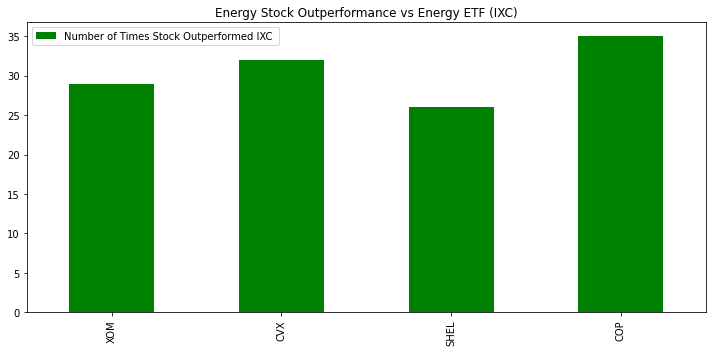

In [142]:
pct_outperformance_df.plot(kind='bar',figsize=(10,5), title="Energy Stock Outperformance vs Energy ETF (IXC)", color='green')

In [ ]:
#Analysis: From gathering data and cleaning it up to calculate percent 
#changes between the stocks we picked and the IXC ETF, we found the number of times(monthly) within
# a 5 year period where the stocks returns outperformed the ETF. XOM outperformed IXC 26 times, CVX beat IXC
#32 times, SHEL beat IXC 26 times and COP beat IXC 35 times. This makes COP the safest stock within the IXC 
# to invest in, in terms of monthly returns calculated from percentage change.
